In [84]:
import torch
import torch.nn.functional as F
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tqdm import tqdm
from sklearn.metrics import classification_report
from pprint import pprint

torch.manual_seed(0)

device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print(device)

data_dim = 60 # feature 갯수
hidden_dim = 512 # 은닉층 길이
output_dim = 1 # true/false
learning_rate = 0.0001
iterations = 50

trainX = np.load('trainX.npy')
trainY = np.load('trainY.npy')

trainX = trainX[:, 0:18, :]


trainX_tensor = torch.FloatTensor(trainX)
trainY_tensor = torch.FloatTensor(trainY)

print(trainX_tensor.shape)
print(trainY_tensor.shape)

class Net(torch.nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim, layers):
        super(Net, self).__init__()
        self.lstm = torch.nn.LSTM(input_dim, hidden_dim, num_layers=layers, batch_first=True)
        self.fc = torch.nn.Linear(hidden_dim, output_dim, bias=True)

    def forward(self, x):
        x, _status = self.lstm(x)
        x = self.fc(x[:, -1])
        x = torch.sigmoid(x)
        return x
    
net = Net(data_dim, hidden_dim, output_dim, 1).to(device)
criterion = torch.nn.BCELoss().to(device)
optimizer = optim.Adam(net.parameters(), lr=learning_rate)
best_loss = float('inf')


for i in tqdm(range(iterations)):
    optimizer.zero_grad()
    outputs = net(trainX_tensor.to(device))
    loss = criterion(outputs, trainY_tensor.to(device))
    loss.backward()
    optimizer.step()





cuda:0
torch.Size([7579, 18, 60])
torch.Size([7579, 1])


100%|██████████| 50/50 [00:55<00:00,  1.10s/it]


In [85]:
testX = np.load('testX.npy')
predic_list = []
net.eval()
for i in range(1,26):
    temp = testX[5:6, 0:i, :]
    testX_tensor = torch.FloatTensor(temp)
    predic = net(testX_tensor.to(device)).item()
    predic_list.append(predic)
print(predic_list)

[0.5888460874557495, 0.5412760972976685, 0.5073779821395874, 0.4612869322299957, 0.4797022044658661, 0.4791077673435211, 0.4722885489463806, 0.40762603282928467, 0.611107349395752, 0.4986432194709778, 0.5606868863105774, 0.5561701655387878, 0.5437532663345337, 0.448738694190979, 0.4835788309574127, 0.5719694495201111, 0.47911909222602844, 0.605109691619873, 0.6175418496131897, 0.4488562345504761, 0.5221079587936401, 0.6187945604324341, 0.617615818977356, 0.6204603910446167, 0.6035985946655273]


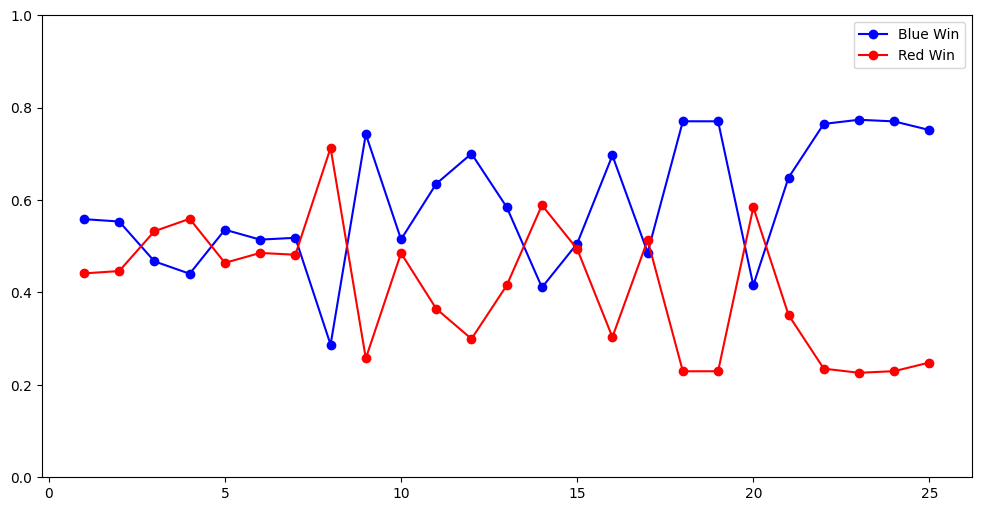

In [76]:
plt.figure(figsize=(12, 6))
plt.plot(range(1,26), predic_list, 'o-', label='Blue Win', color='blue')
plt.plot(range(1,26), [1 - x for x in predic_list], 'o-', label='Red Win', color='red')
plt.ylim(0, 1)
plt.legend()
plt.show()

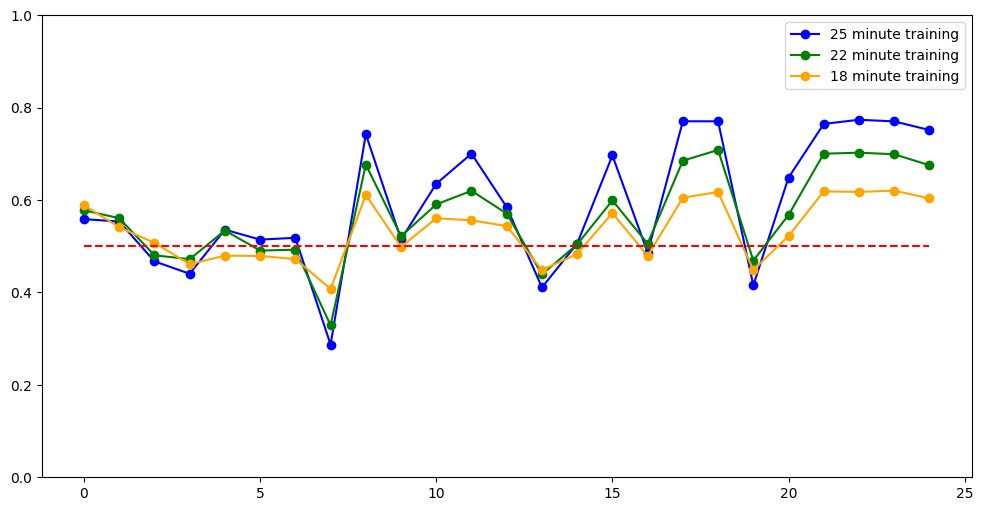

In [93]:
predic_list = [0.5587064623832703, 0.5535992980003357, 0.4673294126987457, 0.4405379891395569, 0.5358856916427612, 0.5144208669662476, 0.518326461315155, 0.2870657444000244, 0.7426916360855103, 0.5148649215698242, 0.6352884769439697, 0.7004665732383728, 0.5846779346466064, 0.41092467308044434, 0.5059071183204651, 0.6966290473937988, 0.48642605543136597, 0.7705733776092529, 0.7704780101776123, 0.4155571460723877, 0.6486474871635437, 0.7648694515228271, 0.7738385796546936, 0.7702920436859131, 0.7516027092933655]
predic_list_22min = [0.5779479742050171, 0.5607353448867798, 0.48050421476364136, 0.47212183475494385, 0.5341185927391052, 0.49073347449302673, 0.49261635541915894, 0.32895851135253906, 0.6768311858177185, 0.521684467792511, 0.5907586812973022, 0.6199873089790344, 0.5708572268486023, 0.4392733573913574, 0.5041168332099915, 0.5991209745407104, 0.5057516694068909, 0.6853174567222595, 0.7084163427352905, 0.4690221846103668, 0.5677818655967712, 0.7003687620162964, 0.7025855183601379, 0.6992130279541016, 0.6753737330436707]
predic_list_18min = [0.5888460874557495, 0.5412760972976685, 0.5073779821395874, 0.4612869322299957, 0.4797022044658661, 0.4791077673435211, 0.4722885489463806, 0.40762603282928467, 0.611107349395752, 0.4986432194709778, 0.5606868863105774, 0.5561701655387878, 0.5437532663345337, 0.448738694190979, 0.4835788309574127, 0.5719694495201111, 0.47911909222602844, 0.605109691619873, 0.6175418496131897, 0.4488562345504761, 0.5221079587936401, 0.6187945604324341, 0.617615818977356, 0.6204603910446167, 0.6035985946655273]
plt.figure(figsize=(12, 6))
plt.plot(range(0,25), predic_list, 'o-', label='25 minute training', color='blue')
plt.plot(range(0,25), predic_list_22min, 'o-', label='22 minute training', color='green')
plt.plot(range(0,25), predic_list_18min, 'o-', label='18 minute training', color='orange')
plt.plot(range(0,25), [0.5 for i in range(25)], '--',color='red')
plt.ylim(0, 1)
plt.legend()
plt.show()